In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import matplotlib as mlp
import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
mlp.rcParams["figure.facecolor"] = "white"
mlp.rcParams["axes.facecolor"] = "white"

In [2]:
datapath = "../../MODIS-Aqua-SST-ChlorA-BBT/output/"

In [3]:
import os 

In [8]:
# Leyendo 2018
i = 0
datasets = []
for filename in os.listdir(datapath):
    if "SST" in filename: # and "MODA2018" in filename:
        dataset = xa.open_dataset(datapath + filename)
        datasets.append(dataset)
        i += 1

In [9]:
datasets = sorted(datasets, key= lambda x: int(x.attrs["product_name"][1:8]) ) 

In [11]:
datasets[-1].attrs["time_coverage_start"][0:10]

'2019-05-01'

In [12]:
# Confirmando que usan las mismas coordenadas
str(datasets[0].lat) == str(datasets[50].lat)

True

In [13]:
# Confirmando que usan las mismas coordenadas
str(datasets[0].lon) == str(datasets[150].lon)

True

In [14]:
concat = xa.concat([x["sst"] for x in datasets], pd.Index(data = pd.to_datetime([x.attrs["time_coverage_start"][0:10] for x in datasets]), name="date" ) )

In [16]:
def countnas(x, axis):
    return np.sum(np.isnan(x), axis)
    
cnas = concat.reduce(countnas, dim="date")

Text(0.5, 1.0, 'NAs count per pixel')

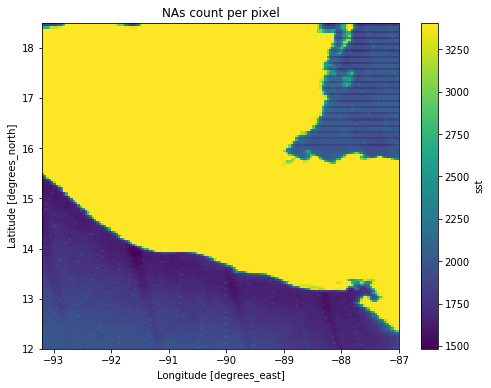

In [17]:
mlp.rcParams["figure.figsize"] = (8,6)

cnas.plot()
plt.title("NAs count per pixel")


In [18]:
# Definir un punto:
lat, lon = (13.5, -90.5)

In [20]:
# Tomando un punto al azar en la costa sur, contando los NAs (casi la mitad)
np.sum(np.isnan(concat.sel(lat = lat, lon=lon, method="nearest")).values) / (365*8.5)

0.5379532634971796

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


TypeError: __new__() got an unexpected keyword argument 'ends'

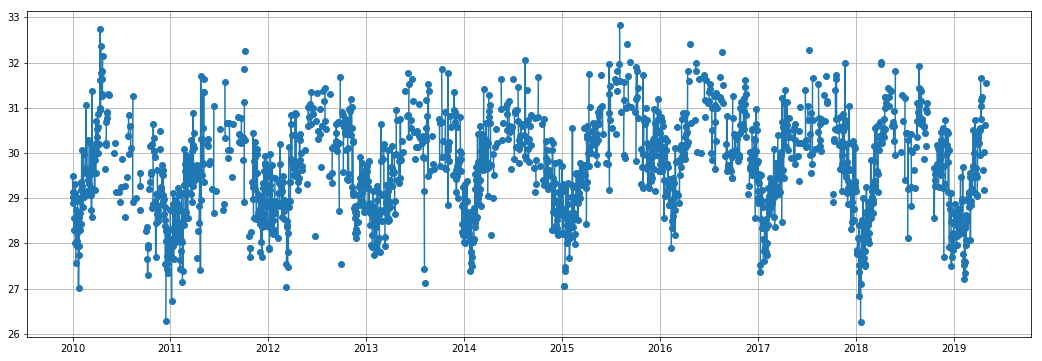

In [22]:
# Tomando un punto al azar en la costa sur, graficando
mlp.rcParams["figure.figsize"] = (18, 6)
plt.plot(concat.date.values, concat.sel(lat = lat, lon=lon, method="nearest").values, marker="o")
#[plt.axvline(x, c="red") for x in np.cumsum([0,31,28,31,30,31,30,31,31,30,31,30,31]) ]
plt.grid("on")
index = pd.DatetimeIndex(start="2010-01-01", ends="2019-06-01", freq="1M")
plt.xticks(index, index.map(lambda x: x.year *100 + x.month), rotation=90)
None

In [48]:
#monthlymeans = concat.groupby("date.month").mean(dim="date")
resampling = concat.resample(date='1M')
monthlymeans = resampling.reduce(np.nanmean, dim="date")

/usr/local/lib/python3.6/dist-packages/xarray/core/variable.py:1371: RuntimeWarning: Mean of empty slice
  data = func(input_data, axis=axis, **kwargs)


In [50]:
def countNotNas(d,axis):
    return np.sum(np.isnan(d)==False, axis=axis)
monthlystd = resampling.reduce(np.nanstd, dim="date")
monthlyn = resampling.reduce(countNotNas, dim="date")
stderr = 2* monthlystd / np.sqrt(monthlyn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  after removing the cwd from sys.path.


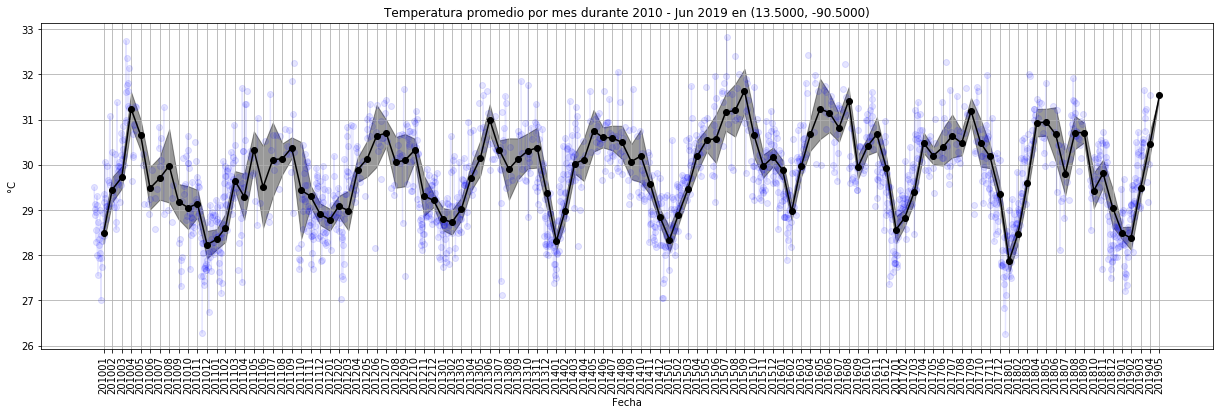

In [56]:
# Temperatura mensual
mlp.rcParams["figure.figsize"] = (21, 6)
ax = plt.subplot(111)
x = pd.DatetimeIndex(start="2010-01-01", end="2019-06-01", freq="1M")
y = monthlymeans.sel(lat = lat, lon=lon, method="nearest").values
err = stderr.sel(lat = lat, lon=lon, method="nearest").values

plt.plot(concat.date.values, concat.sel(lat = lat, lon=lon, method="nearest").values, marker="o", color="blue", alpha=0.1)

plt.plot(x, monthlymeans.sel(lat = lat, lon=lon, method="nearest").values, marker="o", color="black")
#plt.errorbar([calendar.month_abbr[i] for i in monthlymeans.month.values], monthlymeans.sel(lat = lat, lon=lon, method="nearest").values, marker="o", capsize=15,
#             yerr= stderr.sel(lat = lat, lon=lon, method="nearest").values)
plt.fill_between(x, y+err, y-err, color="black", alpha=0.4)

plt.grid("on")
plt.title("Temperatura promedio por mes durante 2010 - Jun 2019 en ({0:.4f}, {1:.4f})".format(lat,lon))

plt.xticks(x, x.map(lambda x: x.year *100 + x.month), rotation=90)
plt.ylabel("°C")
plt.xlabel("Fecha")

None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  after removing the cwd from sys.path.


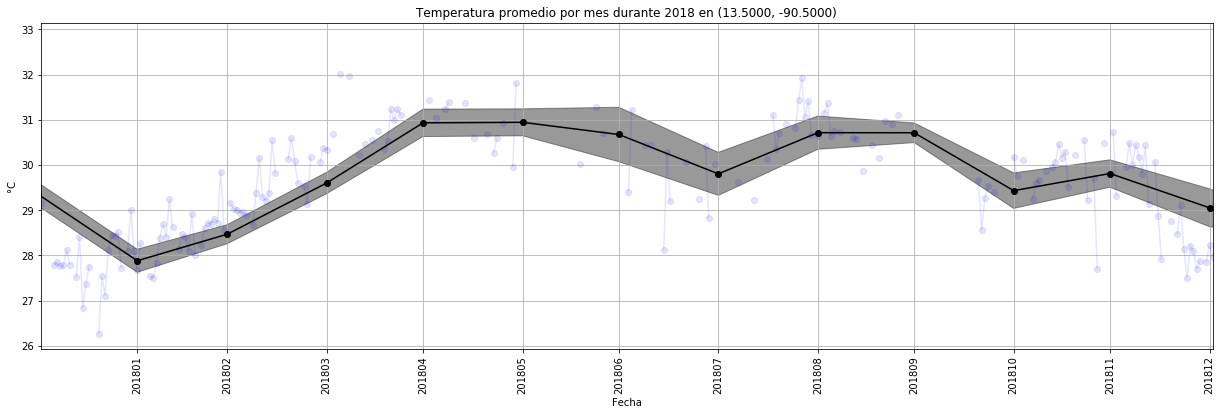

In [58]:
# Temperatura mensual
mlp.rcParams["figure.figsize"] = (21, 6)
ax = plt.subplot(111)
x = pd.DatetimeIndex(start="2010-01-01", end="2019-06-01", freq="1M")
y = monthlymeans.sel(lat = lat, lon=lon, method="nearest").values
err = stderr.sel(lat = lat, lon=lon, method="nearest").values

plt.plot(concat.date.values, concat.sel(lat = lat, lon=lon, method="nearest").values, marker="o", color="blue", alpha=0.1)

plt.plot(x, monthlymeans.sel(lat = lat, lon=lon, method="nearest").values, marker="o", color="black")
#plt.errorbar([calendar.month_abbr[i] for i in monthlymeans.month.values], monthlymeans.sel(lat = lat, lon=lon, method="nearest").values, marker="o", capsize=15,
#             yerr= stderr.sel(lat = lat, lon=lon, method="nearest").values)
plt.fill_between(x, y+err, y-err, color="black", alpha=0.4)

plt.grid("on")
plt.title("Temperatura promedio por mes durante 2018 en ({0:.4f}, {1:.4f})".format(lat,lon))

plt.xticks(x, x.map(lambda x: x.year *100 + x.month), rotation=90)
plt.xlim(pd.to_datetime("2018-01-01"), pd.to_datetime("2019-01-01"))

plt.ylabel("°C")
plt.xlabel("Fecha")

None

In [52]:
monthlystd

<xarray.DataArray 'sst' (date: 113, lat: 156, lon: 149)>
array([[[0.166183, 0.103789, ..., 0.293968, 0.275797],
        [0.201674, 1.177864, ..., 0.489342, 0.421878],
        ...,
        [0.481327, 0.482956, ..., 0.516951, 0.532176],
        [0.521042, 0.552719, ..., 0.494232, 0.529059]],

       [[0.787014, 0.857324, ..., 0.401519, 0.371558],
        [0.829189, 0.884162, ..., 0.354492, 0.398697],
        ...,
        [0.519019, 0.533126, ..., 0.657159, 0.669427],
        [0.554046, 0.526953, ..., 0.623009, 0.628495]],

       ...,

       [[0.878783, 1.006983, ..., 0.417037, 0.430342],
        [1.116733, 1.183797, ..., 0.395781, 0.417441],
        ...,
        [0.707636, 0.547772, ..., 0.705792, 0.659768],
        [0.537646, 0.498058, ..., 0.664782, 0.576532]],

       [[0.      , 0.      , ...,      nan,      nan],
        [0.      , 0.      , ...,      nan,      nan],
        ...,
        [0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0. 